<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment8_CRPSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# Assignment 8: Classification and Regression Problems in Supervised Learning
# Classification — Breast Cancer Dataset SVM
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [29]:
# Load the Breast Cancer Dataset
data = load_breast_cancer()

X = data.data
y = data.target

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (569, 30)
Target shape: (569,)


In [30]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [31]:
# Train SVM Classification Model
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

SVC()

In [32]:
# Make Predictions
y_pred = svm_model.predict(X_test)


In [33]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9473684210526315
Confusion Matrix:
 [[37  6]
 [ 0 71]]


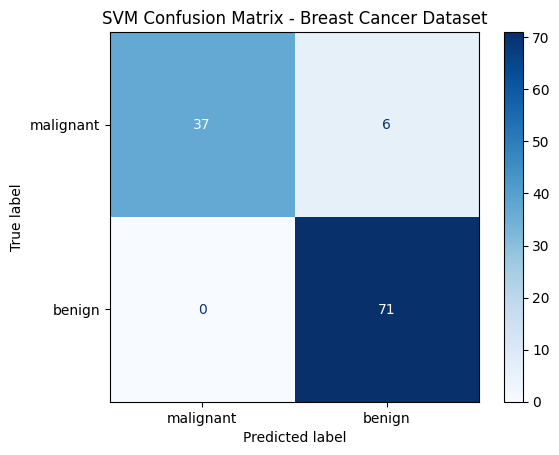

In [34]:
# Visualize Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title("SVM Confusion Matrix - Breast Cancer Dataset")
plt.show()


In [35]:
# Regression — Concrete Compressive Strength Dataset (Random Forest)
# Import Additional Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# Load Concrete Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
concrete_df = pd.read_excel(url)

concrete_df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [37]:
# Split Features and Target
X = concrete_df.drop("Concrete compressive strength(MPa, megapascals) ", axis=1)
y = concrete_df["Concrete compressive strength(MPa, megapascals) "]

In [38]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [39]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [40]:
# Make Predictions
y_pred = rf_model.predict(X_test)


In [41]:
# Evaluate the Regression Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 30.358062374809062
R² Score: 0.8821874643599863


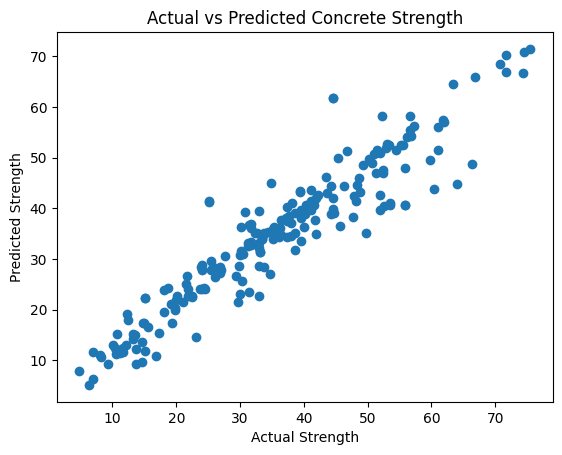

In [42]:
# Plot Actual vs Predicted Values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Actual vs Predicted Concrete Strength")
plt.show()